In [17]:

from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import numpy as np
import sys


In [19]:
if hasattr(sys.stdout, 'reconfigure'):
    sys.stdout.reconfigure(encoding='utf-8')

In [18]:
dataset_path = Path("..") / "data" / "train"


In [ ]:
vis_path = Path("../data_exploration")
vis_path.mkdir(parents=True, exist_ok=True) 

In [20]:
try:
    raw_class_names = sorted([folder.name for folder in dataset_path.iterdir() if folder.is_dir()])
except Exception as e:
    print("Error reading dataset path:", e)
    raw_class_names = []


In [21]:
class_names = [str(name.encode('ascii', 'ignore').decode()) for name in raw_class_names]

print("Total Classes Found:", len(class_names))
try:
    print("Classes:", class_names)
except UnicodeEncodeError:
    print("Class names could not be printed due to encoding error.")

Total Classes Found: 38
Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_

In [22]:

class_counts = {}
for cls in class_names:
    images = list((dataset_path / cls).glob("*.jpg"))[:50]  
    class_counts[cls] = len(images)



C:\Users\Jyoti\AppData\Local\Temp\ipykernel_21032\525193121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="Spectral")


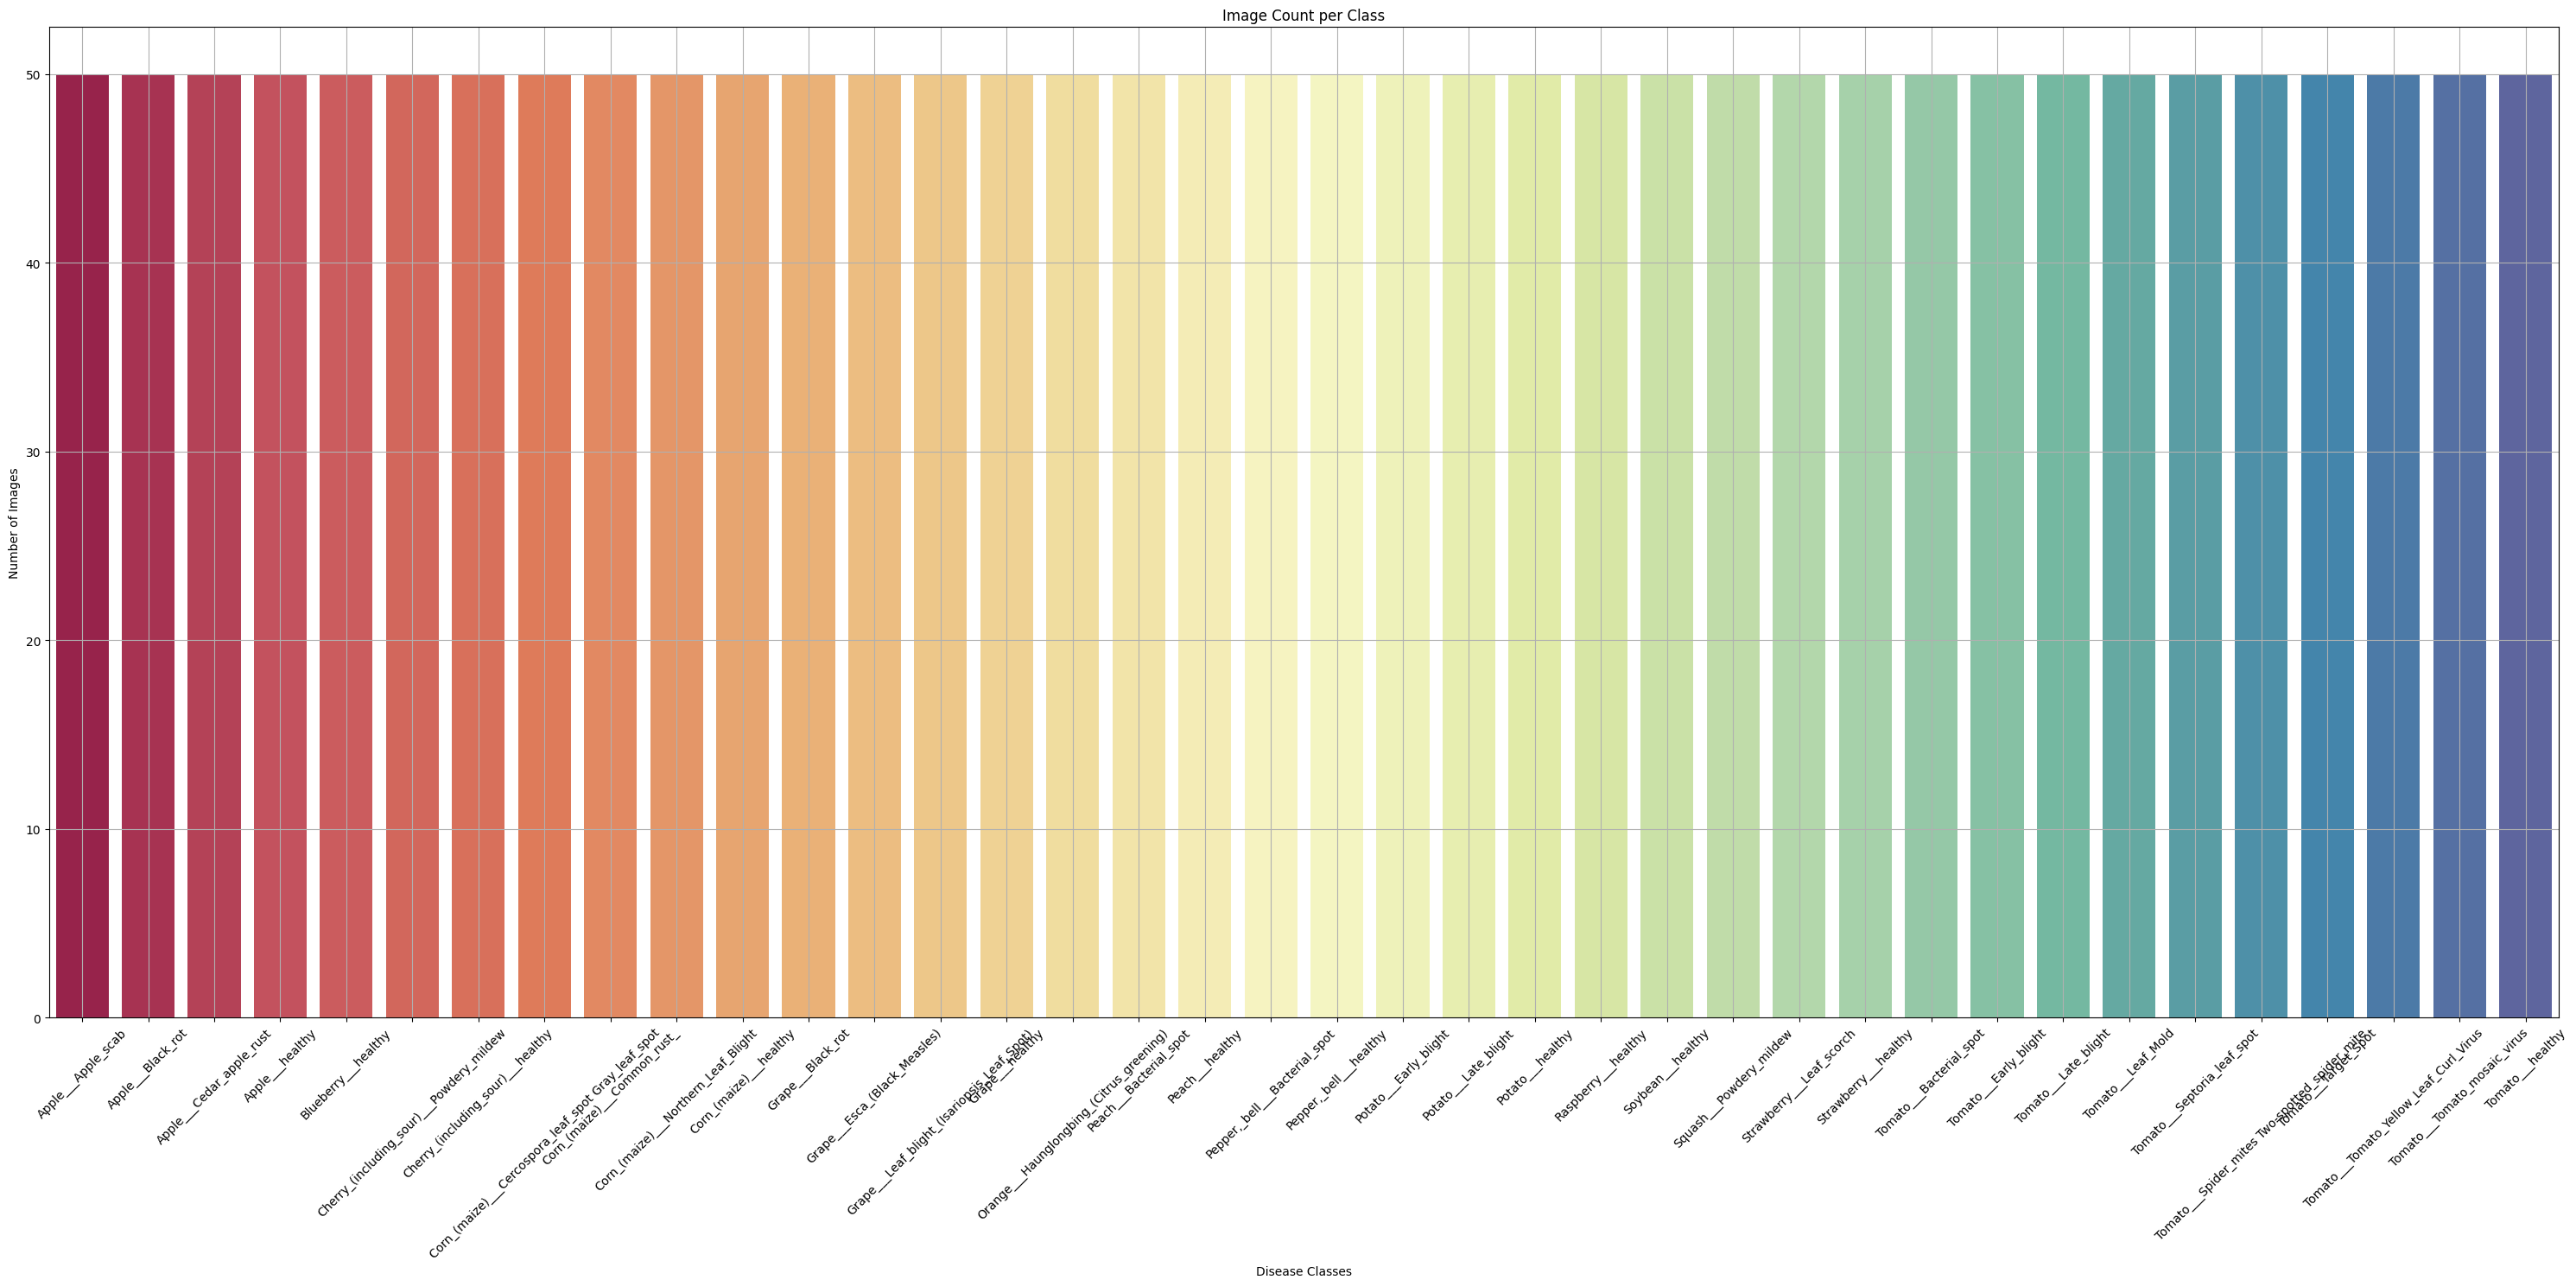

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize=(30, 15))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="Spectral")
plt.xticks(rotation=45)
plt.title("Image Count per Class")
plt.xlabel("Disease Classes")
plt.ylabel("Number of Images")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(vis_path / "class_distribution.png")  

In [26]:
def show_random_images(class_name, n=5):
    img_dir = dataset_path / class_name
    images = random.sample(list(img_dir.glob("*.jpg")), n)

    plt.figure(figsize=(15, 3))
    for i, img_path in enumerate(images):
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

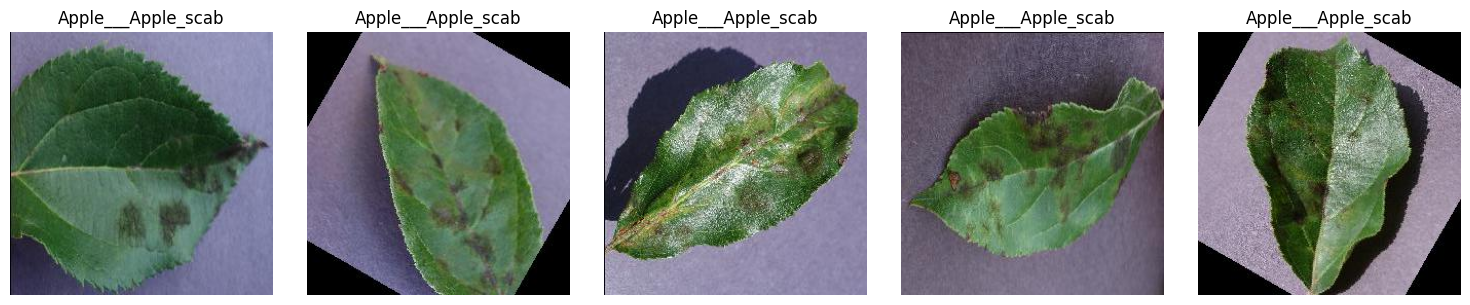

In [ ]:
show_random_images(class_names[0])

In [27]:
img_shapes = []
for cls in class_names:
    img_files = list((dataset_path / cls).glob("*.jpg"))[:3]  # sample few per class
    for img_path in img_files:
        try:
            with Image.open(img_path) as img:
                img_shapes.append(img.size)
        except:
            continue

sizes, counts = np.unique(img_shapes, return_counts=True, axis=0)
print("\n\u2139 Image Size Distribution (WxH):")
for s, c in zip(sizes, counts):
    print(f"{s}: {c} images")


ℹ Image Size Distribution (WxH):
[256 256]: 114 images


In [29]:
def analyze_brightness(image_path):
    img = Image.open(image_path).convert("L") 
    return np.array(img).mean()

brightness_vals = []
for cls in class_names:
    img_files = list((dataset_path / cls).glob("*.jpg"))[:3] 
    for img_path in img_files:
        try:
            brightness_vals.append(analyze_brightness(img_path))
        except:
            continue
        

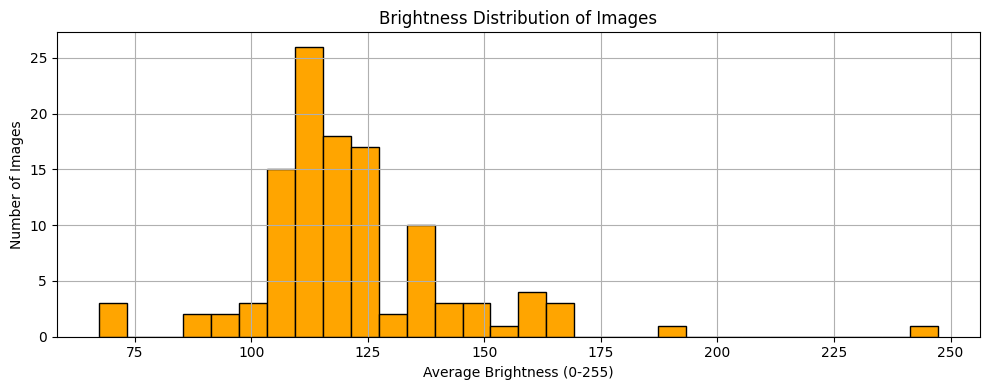

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize=(10, 4))
plt.hist(brightness_vals, bins=30, color='orange', edgecolor='black')
plt.title("Brightness Distribution of Images")
plt.xlabel("Average Brightness (0-255)")
plt.ylabel("Number of Images")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(vis_path / "sample_brightness_distribution.png") 